In [7]:
import pandas as pd
# 1. Loading the Data
# Load the dataset
housing_data = pd.read_csv('housing_data.csv')
# Display the first few rows of the dataset
housing_data.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [9]:
# 2. Cleaning the Data
# Handling missing values
housing_data['Electrical'].fillna(housing_data['Electrical'].mode()[0], inplace=True)
housing_data['GarageYrBlt'].fillna(housing_data['YearBuilt'], inplace=True)

# Removing duplicates (if any)
housing_data.drop_duplicates(inplace=True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

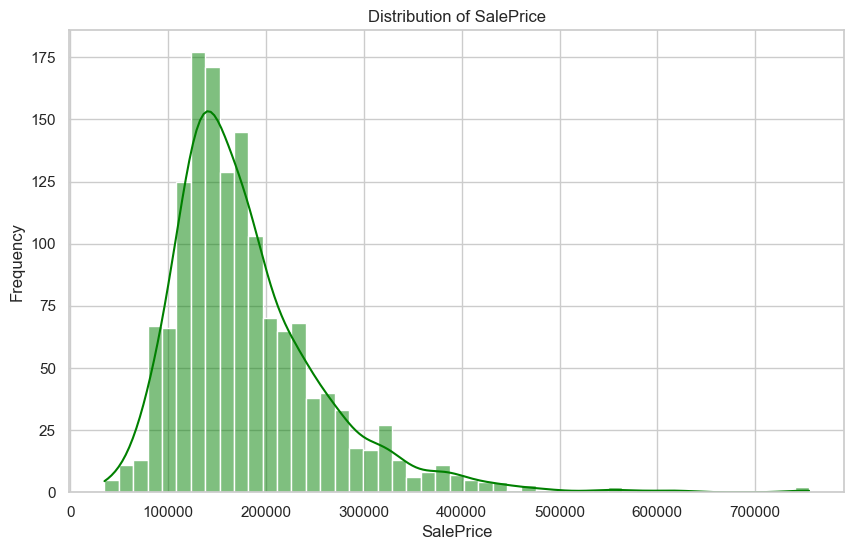

In [32]:
# 3. Univariate Analysis
# Distribution of SalePrice
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['SalePrice'], kde=True, color='green')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

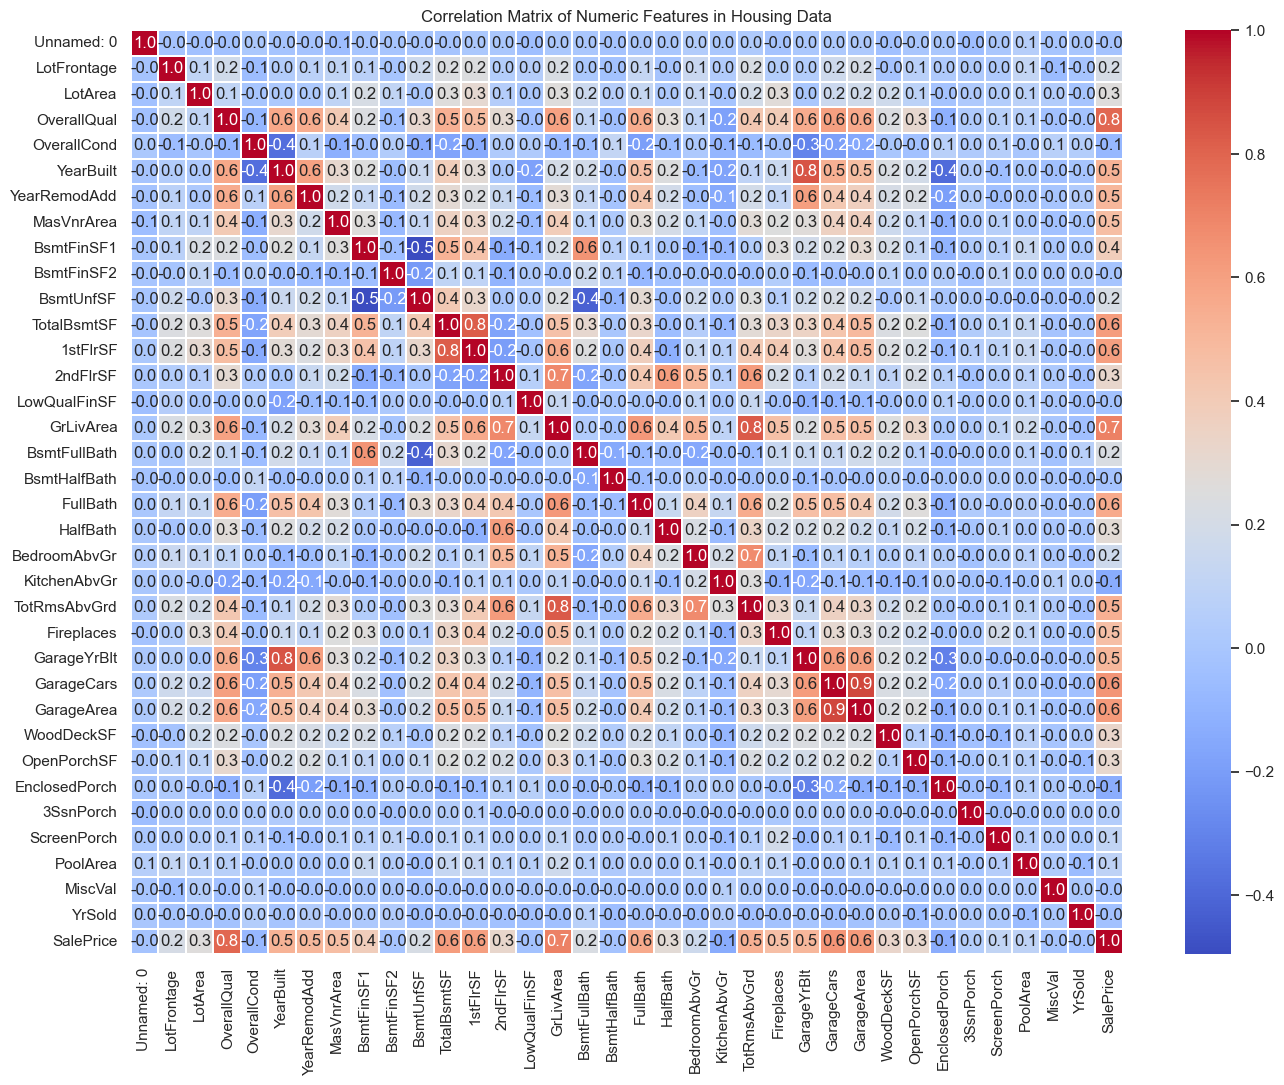

In [23]:
# 4. Multivariate Analysis
# Correlation matrix
numeric_cols = housing_data.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(16, 12))
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm',linewidths=0.1)
plt.title('Correlation Matrix of Numeric Features in Housing Data')
plt.show()

C:\Users\Kabir\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


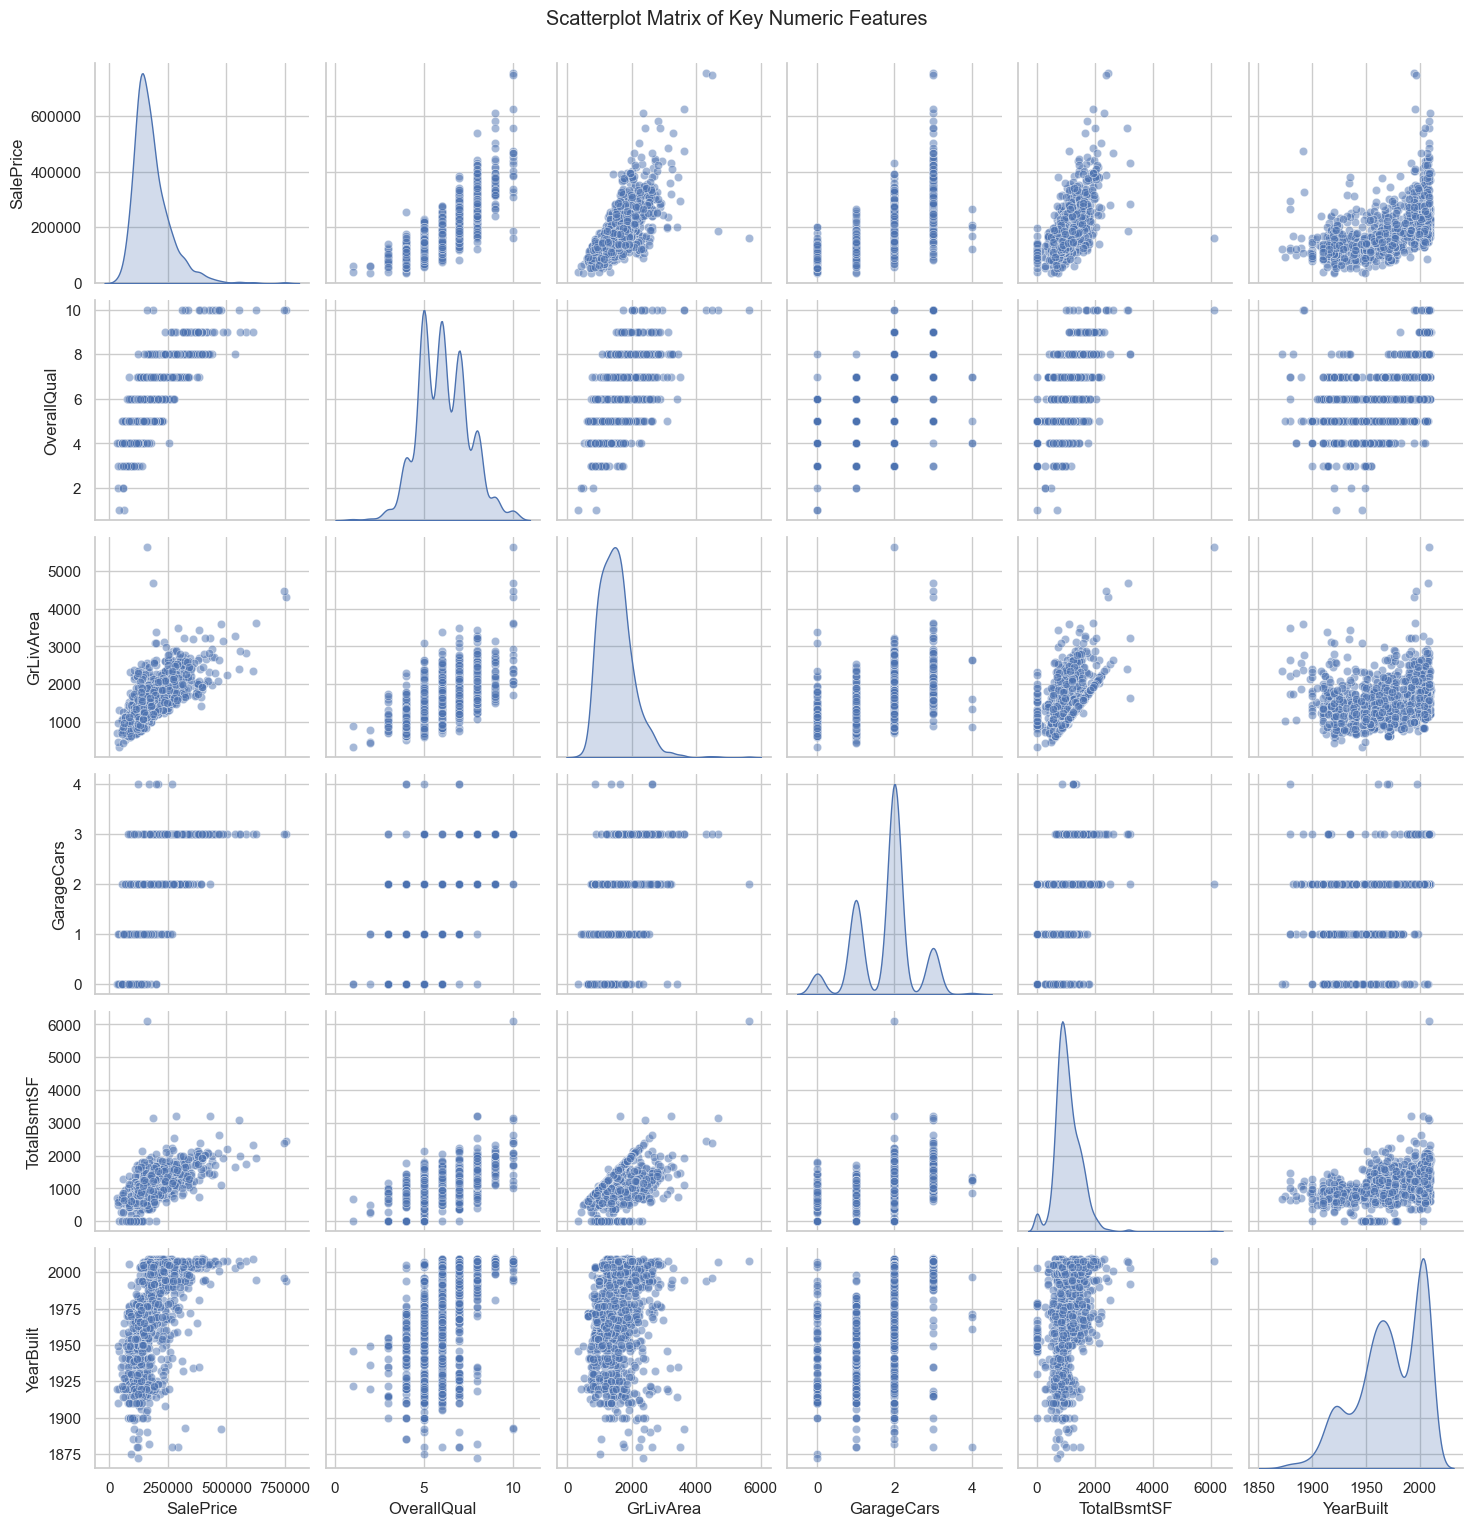

In [35]:
# 2. Scatterplot Matrix (Pairplot) with Key Numeric Features
key_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(df_numeric[key_features], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Scatterplot Matrix of Key Numeric Features", y=1.02)
plt.show()

In [26]:
# 5. Feature Engineering
# Price per square foot
housing_data['PricePerSqFt'] = housing_data['SalePrice'] / housing_data['GrLivArea']

# Property age at the time of sale
housing_data['PropertyAge'] = housing_data['YrSold'] - housing_data['YearBuilt']
housing_data.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerSqFt,PropertyAge
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,No,No,0,Feb,2008,WD,Normal,208500,121.929825,5
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,No,No,0,May,2007,WD,Normal,181500,143.819334,31
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,No,No,0,Sep,2008,WD,Normal,223500,125.139978,7
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,No,No,0,Feb,2006,WD,Abnorml,140000,81.537566,91
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,No,No,0,Dec,2008,WD,Normal,250000,113.739763,8


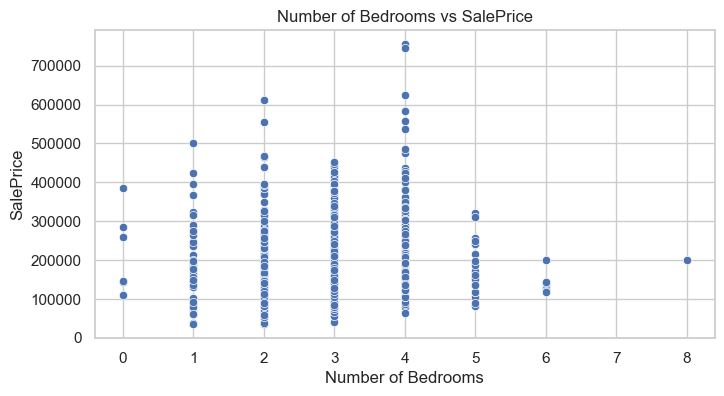

In [28]:
# 6. Feature Engineering and Size Impact
# Relationship between number of bedrooms and SalePrice
plt.figure(figsize=(8, 4))
sns.scatterplot(x=housing_data['BedroomAbvGr'], y=housing_data['SalePrice'])
plt.title('Number of Bedrooms vs SalePrice')
plt.xlabel('Number of Bedrooms')
plt.ylabel('SalePrice')
plt.show()

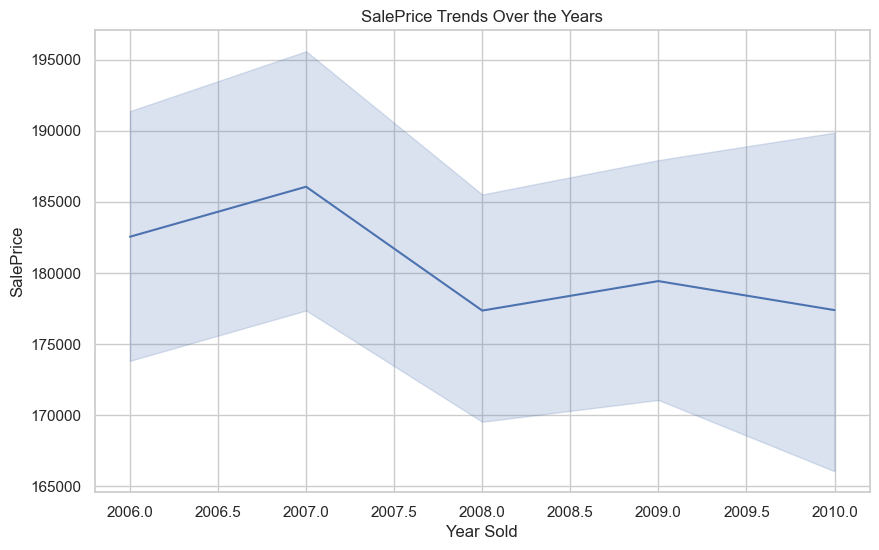

In [29]:
# 7. Market Trends and Historical Pricing
# Trend of SalePrice over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=housing_data['YrSold'], y=housing_data['SalePrice'])
plt.title('SalePrice Trends Over the Years')
plt.xlabel('Year Sold')
plt.ylabel('SalePrice')
plt.show()

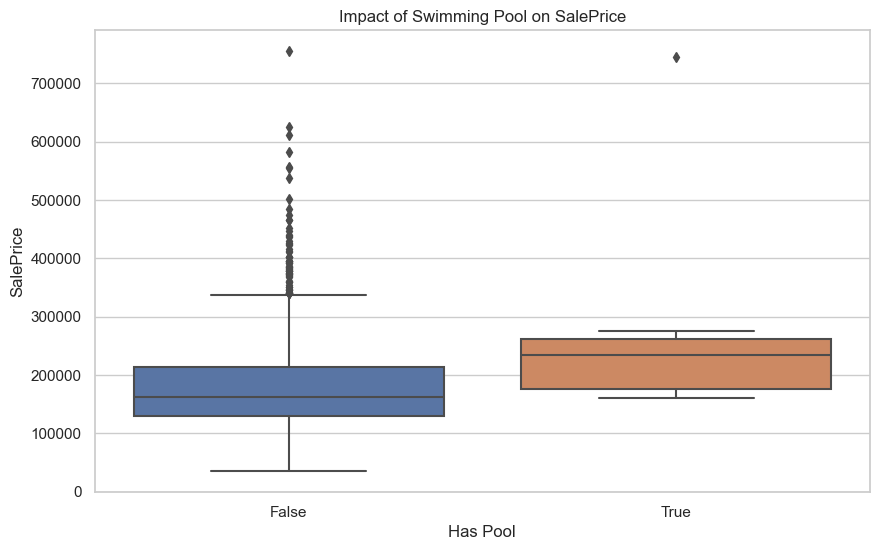

In [30]:
# 8. Customer Preferences and Amenities
# Impact of having a swimming pool on SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_data['PoolArea'] > 0, y=housing_data['SalePrice'])
plt.title('Impact of Swimming Pool on SalePrice')
plt.xlabel('Has Pool')
plt.ylabel('SalePrice')
plt.show()